Loading a Kaggle Dataset into Colab

In [3]:
# Upload a Kaggle Json File(Kaggle API Key)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saiprasannaudara","key":"37b86a60baaae9092bd188384a5aa2c0"}'}

In [4]:
# Kaggle Credentials Path
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Install Kaggle Python Libraries
!pip install kaggle

# Set Permissions
!chmod 600 /content/kaggle.json

In [5]:
# Dataset download
!kaggle datasets download nicapotato/womens-ecommerce-clothing-reviews

Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
License(s): CC0-1.0
  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 229MB/s]


In [6]:
# Unzip the downloaded file
!unzip womens-ecommerce-clothing-reviews.zip

Archive:  womens-ecommerce-clothing-reviews.zip
  inflating: Womens Clothing E-Commerce Reviews.csv  


Importing Required Libraries and loading the data into Dataframe

In [28]:
# Importing pandas, numpy and matplot libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the data
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

Step-1 : Exploratory Data Analysis

(a)DataSet Structure Analysis

In [23]:
# Dataset Structure
# Print Shape of the data
print(f"shape: {df.shape}")

# Print Number of rows and columns
print(f"Number of Rows: {df.shape[0]:}")
print(f"Number of Columns: {df.shape[1]}")

# Print Column Names
print(f"Header Columns: {df.columns.tolist()}")

shape: (23486, 11)
Number of Rows: 23486
Number of Columns: 11
Header Columns: ['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']


In [55]:
# Print first five rows
print(f"First Five rows:")
df.head()

First Five rows:


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


(b) Datatype Analysis

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [30]:
# Print the data types
print(df.dtypes.value_counts())
print(f"data types:\n{df.dtypes}")

int64     6
object    5
Name: count, dtype: int64
data types:
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [27]:
#print Text columns and Numeric Columns
text_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['int64']).columns

print(f"Text Columns:\n {text_columns.tolist()}")
print(f"Numeric Columns:\n {numeric_columns.tolist()}")

Text Columns:
 ['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']
Numeric Columns:
 ['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']


(C) Missing Value Analysis

In [21]:
# Missing Values Analysis
print(f"Missing Null Values:\n{df.isnull().sum()}")

Missing Null Values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


(d) Duplicate records

In [42]:
# Print number of records in Review text column
print(f"Number of Review texts: {len(df['Review Text'])}")

# Duplicate records in review text column
if 'Review Text' in df.columns:
    text_duplicates = df['Review Text'].duplicated().sum()
    print(f"Duplicate Text Reviews: {text_duplicates}")

Number of Review texts: 23486
Duplicate Text Reviews: 851


(e) Rating Distribution

In [34]:
# Print number of records in Rating Column
print(f"Number of Ratings: {len(df['Rating'])}")

Number of Ratings: 23486


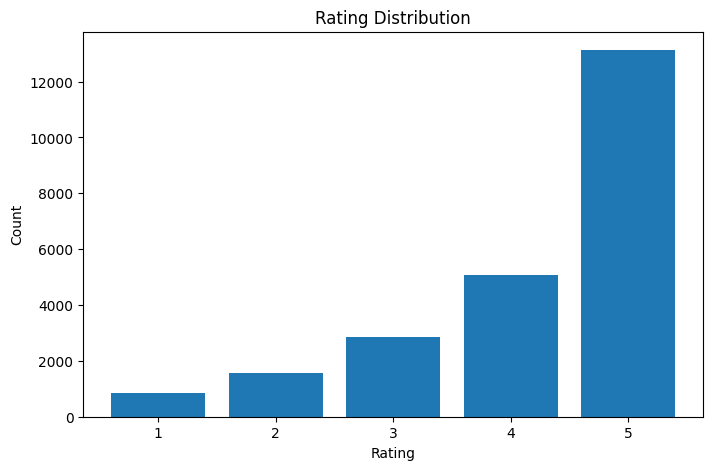

In [41]:
# Visualize the Rating Distribution
rating_counts = df['Rating'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

(f) Brand Analysis

In [45]:
# Print number of unique records of Clothing ID
unique_ID = len(df['Clothing ID'].unique())
len_Clothing_ID = len(df['Clothing ID'])

print(f"Number of clothing ID's: {len_Clothing_ID}")
print(f"Number of Unique Clothing ID's: {unique_ID}")

Number of clothing ID's: 23486
Number of Unique Clothing ID's: 1206


Top brands by Review Count: 
 Clothing ID
1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
Name: count, dtype: int64


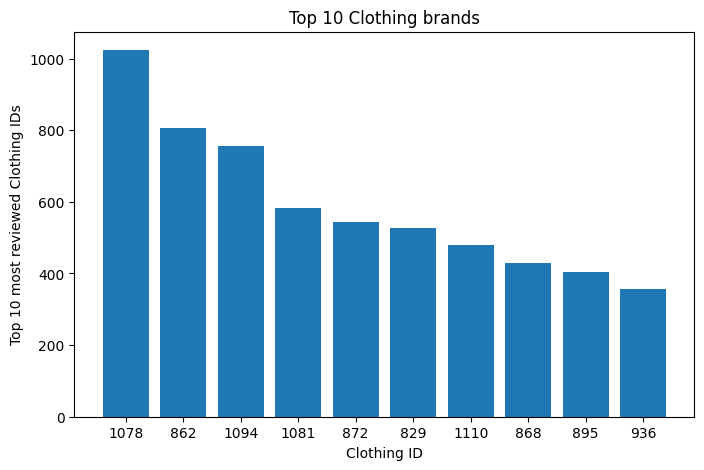

In [62]:
top_10_ids = df['Clothing ID'].value_counts().head(10)
print(f"Top brands by Review Count: \n {top_10_ids}")
plt.figure(figsize=(8,5))
plt.bar(top_10_ids.index.astype(str), top_10_ids.values)
plt.title('Top 10 Clothing brands')
plt.xlabel('Clothing ID')
plt.ylabel('Top 10 most reviewed Clothing IDs')
plt.show()